<a href="https://colab.research.google.com/github/GOPIKAV77/Python/blob/main/Dummy_variables_house_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regression using dummy variables

In [5]:
import pandas as pd
import numpy as np
df = pd.read_csv("house_sales.csv")
df.head(3)

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
0,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.0,2,9373,...,3.00,6,7,1991,0,0,70000,229000,98002,False
1,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.0,1,20156,...,3.75,4,10,2005,0,0,203000,590000,98166,True
2,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.0,1,26036,...,1.75,4,8,1947,0,0,183000,275000,98166,False


In [3]:
import matplotlib as mpl
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as s

Linear Regression

Text(0.5, 0, 'SalePrice')

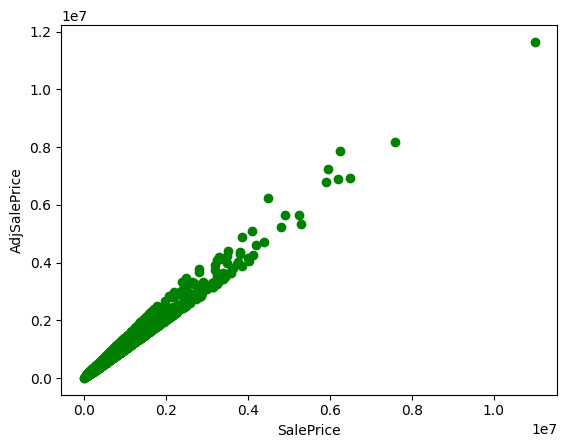

In [11]:
plt.scatter(df['SalePrice'],df['AdjSalePrice'],color="green")
plt.ylabel("AdjSalePrice")
plt.xlabel("SalePrice")

**OLS SUMMARY**

In [12]:
from statsmodels.formula.api import ols
reg = ols(formula="SalePrice~AdjSalePrice",data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                 7.634e+05
Date:                Sun, 23 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:26:21   Log-Likelihood:            -2.8137e+05
No. Observations:               22687   AIC:                         5.627e+05
Df Residuals:                   22685   BIC:                         5.628e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     6934.6731    693.994      9.992      0.000    5574.397    8294.949
AdjSalePrice     0.8863      0.001    873.728      0.000       0.884       0.888
==============================================================================
Omnibus:                     8432.468   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           190015.666
Skew:                          -1.257   Prob(JB):                         0.00
Kurtosis:                      16.953   Cond. No.                     1.21e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**RESULT**

```

coef	std err	t	P>|t|	[0.025	0.975]
Intercept	6934.6731	693.994	9.992	0.000	5574.397	8294.949
AdjSalePrice	0.8863	0.001	873.728	0.000	0.884	0.888





Y = 6934.67 + 0.8863 x

**PLOT**

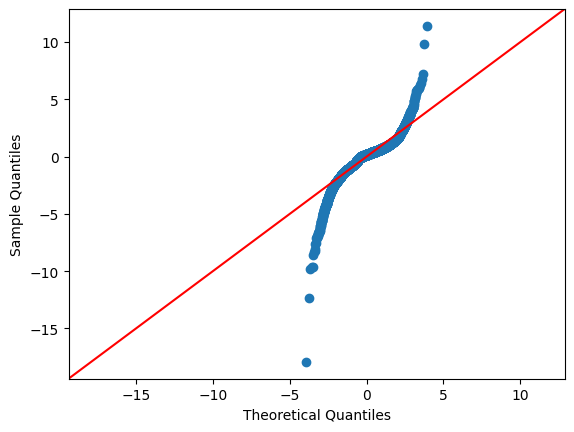

In [14]:
residual = reg.resid
probplot = s.ProbPlot(residual, stats.norm, fit = True )
fig = probplot.qqplot(line='45')


In [17]:
dummies = pd.get_dummies(df["PropertyType"])
dummies = dummies.astype("int")
dummies

,Multiplex,Single Family,Townhouse
0,1,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
22682,0,1,0
22683,0,1,0
22684,0,1,0
22685,0,1,0


In [21]:
step = pd.concat([df, dummies],axis =1)
step.drop(["PropertyType","Multiplex"],inplace=True,axis=1)
step.head(2)

,DocumentDate,SalePrice,PropertyID,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,SqFtTotLiving,...,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction,Single Family,Townhouse
0,2014-09-16,280000,1000102,2014-09-01,405100,0.930836,300805.0,2,9373,2400,...,7,1991,0,0,70000,229000,98002,False,0,0
1,2006-06-16,1000000,1200013,2006-06-01,404400,0.929228,1076162.0,1,20156,3764,...,10,2005,0,0,203000,590000,98166,True,1,0


In [35]:
result = sm.ols(formula="SalePrice~AdjSalePrice + Townhouse", data = step).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                 3.817e+05
Date:                Sun, 23 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:47:28   Log-Likelihood:            -2.8137e+05
No. Observations:               22687   AIC:                         5.627e+05
Df Residuals:                   22684   BIC:                         5.628e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     7195.4517    712.983     10.092      0.000    5797.957    8592.947
AdjSalePrice     0.8862      0.001    870.114      0.000       0.884       0.888
Townhouse    -2370.7427   1486.847     -1.594      0.111   -5285.065     543.580
==============================================================================
Omnibus:                     8423.395   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           189800.917
Skew:                          -1.255   Prob(JB):                         0.00
Kurtosis:                      16.946   Cond. No.                     2.62e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.62e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**RESULT**

```

coef	std err	t	P>|t|	[0.025	0.975]
Intercept	7195.4517	712.983	10.092	0.000	5797.957	8592.947
AdjSalePrice	0.8862	0.001	870.114	0.000	0.884	0.888
Townhouse	-2370.7427	1486.847	-1.594	0.111	-5285.065	543.580


Y = 7195.4517 +0.8862 x1 -2370.7427 x2